(a) Choose the first 30 samples for training and the last 20 samples for testing.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics

with open('iris.data', 'r') as file: 
    # Read the contents of the file 
    data1 = file.readlines()


data = [line.strip().split(',') for line in data1 if line.strip() != '']


x_data = [[float(value) for value in row[:-1]] for row in data]


x_data = np.array(x_data, dtype=np.float32)


#Appending ones to training set and test, to represent bias

x_data = np.hstack((x_data, np.ones((x_data.shape[0], 1), dtype=x_data.dtype)))

#Extracting the y-labels fron the dat set, these are the 
y_labels = [row[-1] for row in data]


#Preprossessing of data: We give each flower one-hot encoded label
lb = LabelBinarizer()
lb.fit(y_labels)
labels = lb.transform(y_labels)


#Splitting of data into a test set and a training set
X_train = np.concatenate([x_data[0:30], x_data[50:80], x_data[100:130]])
T_train = np.concatenate([labels[0:30], labels[50:80], labels[100:130]])

X_test = np.concatenate([x_data[30:50], x_data[80:100], x_data[130:150]])
T_test = np.concatenate([labels[30:50], labels[80:100], labels[130:150]])



(b) Train a linear classifier as described in chapters 2.4 and 3.2 of the ”Compendium
- Part III - Classification” on blackboard. Tune the step factor α in Equation 23,
with MSE defined as in Equation 19, until the training converges

In [88]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Computing the MSE gradient

def compute_gradients(X, G, T):
    delta = (G - T) * G * (1 - G)     # shape: (N, C)
    grad_W = delta.T @ X             # (C, N) @ (N, D+1) = (C, D+1)
    return grad_W

def compute_mse(G, T):
    return 0.5 * np.mean(np.sum((G - T)**2, axis=1))


def train_linear_classifier(X, T, num_classes, num_epochs=1000, alpha=0.005):
    N, D_plus_1 = X.shape
    W = np.random.randn(num_classes, D_plus_1) * 0.01  # weight
    loss_history = []
    patience = 10
    min_delta = 0.00001  # Minimum change in loss to be considered an improvement
    best_loss = float('inf')
    wait = 0

    for epoch in range(num_epochs):
        Z = X @ W.T
        G = sigmoid(Z)
        grad_W = compute_gradients(X, G, T)
        W -=alpha* grad_W
        loss = compute_mse(G,T)
        loss_history.append(loss)

    return W, loss_history


def get_predictions_and_targets(X,T,W):
    Z = X @ W.T
    G = sigmoid(Z)
    preds = np.argmax(G, axis=1)
    targets = np.argmax(T, axis=1)
    
    return preds, targets



In [89]:
#Initiliazation of hyperparameters
LEARNING_RATE = 0.005
NUM_EPOCHS = 2000
NUM_CLASSES = 3


W_trained, loss_history, = train_linear_classifier(X_train, T_train, NUM_CLASSES, NUM_EPOCHS, LEARNING_RATE)

plt.plot(loss_history)
plt.xlabel("Epochs")
plt.grid(True)
plt.ylabel("MSE Loss")
plt.show()


TypeError: cannot unpack non-iterable NoneType object

(c) Find the confusion matrix and the error rate for both the training and test sets.


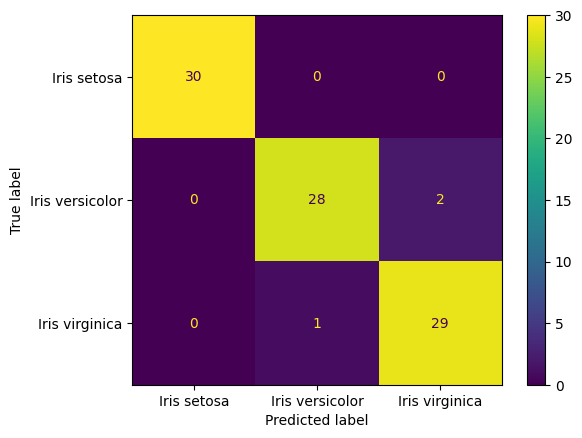

Accuracy for training set is 0.97


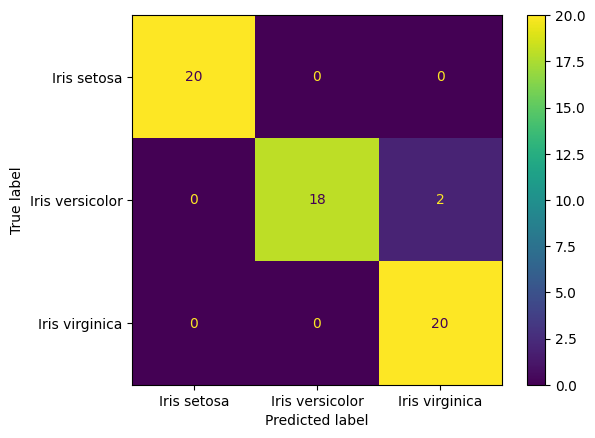

Accuracy for test set is 0.97


In [81]:
#Confusion matrices for training set

train_preds, train_targets = get_predictions_and_targets(X_train, T_train, W_trained)

train_confusion_matrix = metrics.confusion_matrix(train_targets, train_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

#Error rate for training set
train_accuracy = np.mean(train_preds == train_targets)
print(f"Accuracy for training set is {train_accuracy:.2f}")


#Confusion matrix
test_preds, test_targets = get_predictions_and_targets(X_test, T_test, W_trained)
train_confusion_matrix = metrics.confusion_matrix(test_targets, test_preds)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()


#Error rate for training set
test_accuracy = np.mean(test_preds == test_targets)
print(f"Accuracy for test set is {test_accuracy:.2f}")


#Confusion matrices and errror rate for training set



(d) Now use the last 30 samples for training and the first 20 samples for testing.
Repeat the training and test phases for this case.


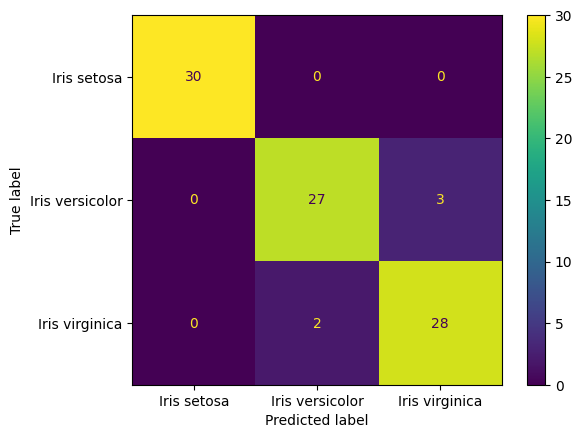

Accuracy for training set is 0.94
Accuracy for test set is 0.98


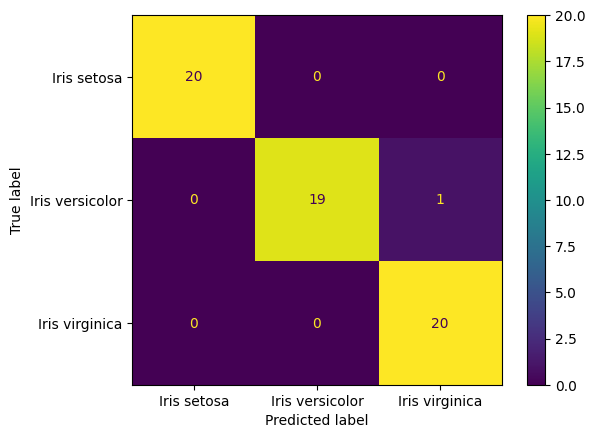

In [82]:
X_test2 = np.concatenate([x_data[0:20], x_data[50:70], x_data[100:120]])
T_test2= np.concatenate([labels[0:20], labels[50:70], labels[100:120]])

X_train2 = np.concatenate([x_data[20:50], x_data[70:100], x_data[120:150]])
T_train2 = np.concatenate([labels[20:50], labels[70:100], labels[120:150]])


W_trained2, loss_history = train_linear_classifier(X_train2, T_train2, NUM_CLASSES, NUM_EPOCHS, LEARNING_RATE)


train_preds2, train_targets2 = get_predictions_and_targets(X_train2, T_train2, W_trained2)

#Confusion matrices and errror rate for training set

train_confusion_matrix = metrics.confusion_matrix(train_targets2, train_preds2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = train_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

train_accuracy2 = np.mean(train_preds2 == train_targets2)
print(f"Accuracy for training set is {train_accuracy2:.2f}")


#Finds 
test_preds2, test_targets2 = get_predictions_and_targets(X_test2, T_test2, W_trained2)
test_accuracy2 = np.mean(test_preds2 == test_targets2)
print(f"Accuracy for test set is {test_accuracy2:.2f}")

#Confusion matrices and errror rate for test set
test_confusion_matrix = metrics.confusion_matrix(test_targets2, test_preds2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

(e) Compare the results for the two cases and comment.


2: (a) Produce histograms for each feature and class. Remove the feature that shows the
most overlap between the classes. Train and test a classifier with the remaining
three features.


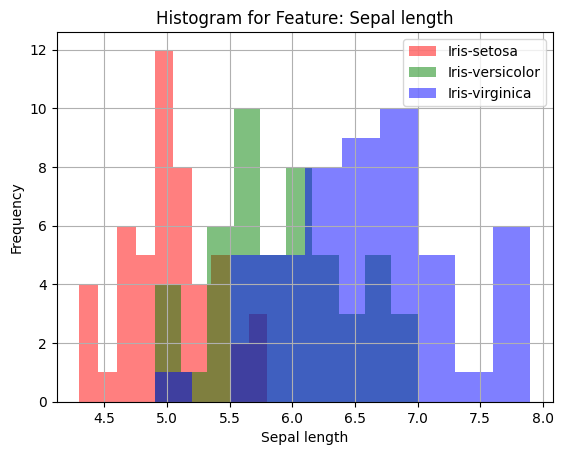

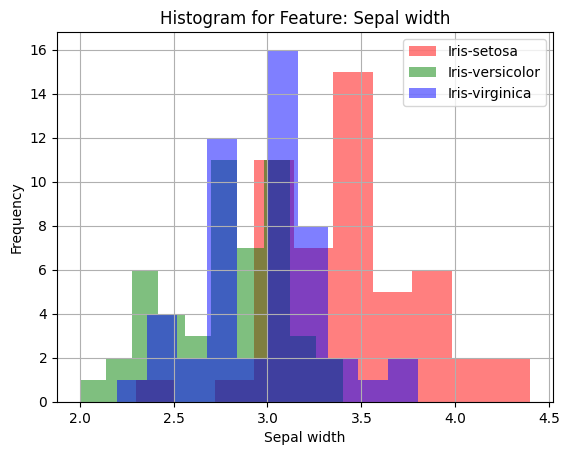

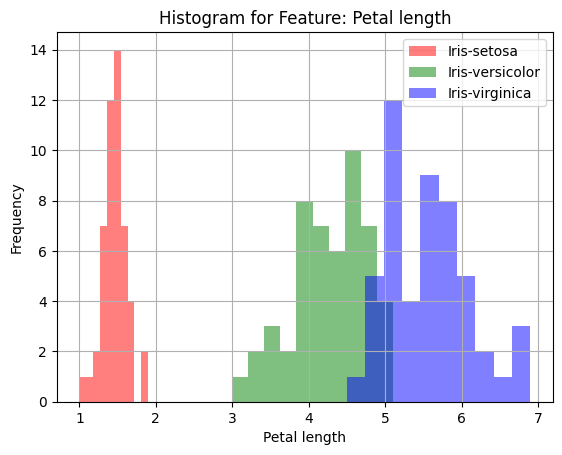

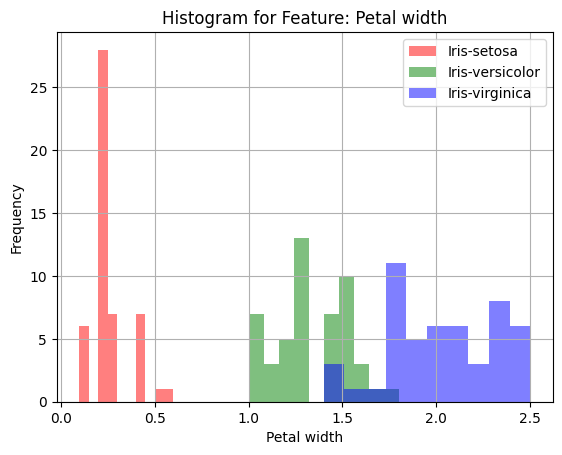

In [83]:
data = [line.strip().split(',') for line in data1 if line.strip() != '']

features = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['red', 'green', 'blue']

for i in range(4):
    plt.figure()
    for j, label in enumerate(class_labels):
        values = [float(row[i]) for row in data if row[-1] == label]
        plt.hist(values, bins=10, alpha=0.5, label=label, color=colors[j])
    plt.title(f'Histogram for Feature: {features[i]}')
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


[[5.1 1.4 0.2 1. ]
 [4.9 1.4 0.2 1. ]
 [4.7 1.3 0.2 1. ]
 [4.6 1.5 0.2 1. ]
 [5.  1.4 0.2 1. ]
 [5.4 1.7 0.4 1. ]
 [4.6 1.4 0.3 1. ]
 [5.  1.5 0.2 1. ]
 [4.4 1.4 0.2 1. ]
 [4.9 1.5 0.1 1. ]
 [5.4 1.5 0.2 1. ]
 [4.8 1.6 0.2 1. ]
 [4.8 1.4 0.1 1. ]
 [4.3 1.1 0.1 1. ]
 [5.8 1.2 0.2 1. ]
 [5.7 1.5 0.4 1. ]
 [5.4 1.3 0.4 1. ]
 [5.1 1.4 0.3 1. ]
 [5.7 1.7 0.3 1. ]
 [5.1 1.5 0.3 1. ]
 [5.4 1.7 0.2 1. ]
 [5.1 1.5 0.4 1. ]
 [4.6 1.  0.2 1. ]
 [5.1 1.7 0.5 1. ]
 [4.8 1.9 0.2 1. ]
 [5.  1.6 0.2 1. ]
 [5.  1.6 0.4 1. ]
 [5.2 1.5 0.2 1. ]
 [5.2 1.4 0.2 1. ]
 [4.7 1.6 0.2 1. ]
 [4.8 1.6 0.2 1. ]
 [5.4 1.5 0.4 1. ]
 [5.2 1.5 0.1 1. ]
 [5.5 1.4 0.2 1. ]
 [4.9 1.5 0.1 1. ]
 [5.  1.2 0.2 1. ]
 [5.5 1.3 0.2 1. ]
 [4.9 1.5 0.1 1. ]
 [4.4 1.3 0.2 1. ]
 [5.1 1.5 0.2 1. ]
 [5.  1.3 0.3 1. ]
 [4.5 1.3 0.3 1. ]
 [4.4 1.3 0.2 1. ]
 [5.  1.6 0.6 1. ]
 [5.1 1.9 0.4 1. ]
 [4.8 1.4 0.3 1. ]
 [5.1 1.6 0.2 1. ]
 [4.6 1.4 0.2 1. ]
 [5.3 1.5 0.2 1. ]
 [5.  1.4 0.2 1. ]
 [7.  4.7 1.4 1. ]
 [6.4 4.5 1.5 1. ]
 [6.9 4.9 1.

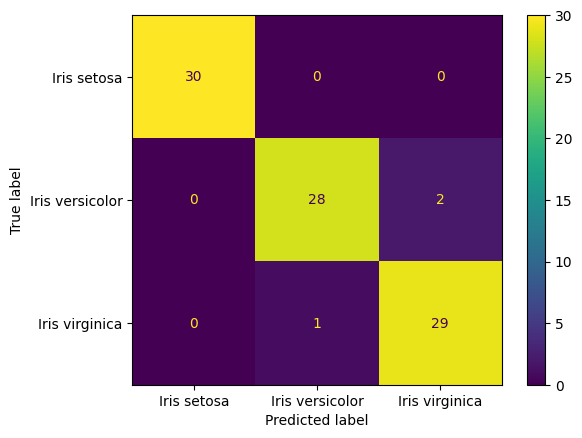

Accuracy for test set is 0.95


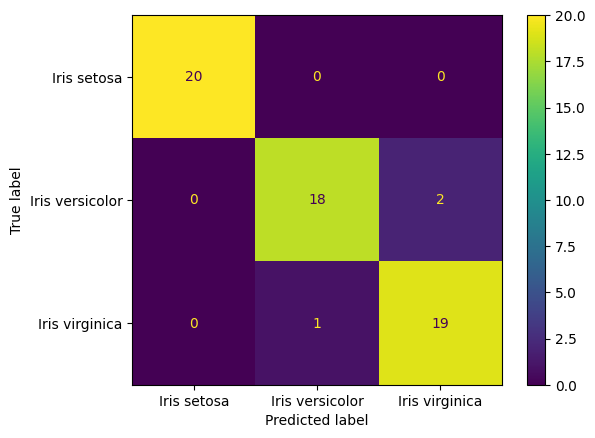

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [84]:
#We see that the sepal width feature gives the most overlap between classes, so we choose to remove this class.

if x_data.shape[1] == 5:
    X_reduced = np.delete(x_data, 1, axis=1)

print(X_reduced)

X_train_reduced = np.concatenate([X_reduced[0:30], X_reduced[50:80], X_reduced[100:130]])

X_test_reduced = np.concatenate([X_reduced[30:50], X_reduced[80:100], X_reduced[130:150]])


W_train_reduced, loss_history = train_linear_classifier(X_train_reduced, T_train, NUM_CLASSES, NUM_EPOCHS, LEARNING_RATE)

train_preds_reduced, train_targets_reduced = get_predictions_and_targets(X_train_reduced, T_train, W_train_reduced)
#Accuracy for reduced training set

train_accuracy = np.mean(train_preds_reduced == train_targets_reduced)
print(f"Accuracy for training set is {train_accuracy:.2f}")


#Confusion matrix for reduced training set
test_confusion_matrix = metrics.confusion_matrix(train_targets_reduced, train_preds_reduced)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

test_preds_reduced, test_targets_reduced = get_predictions_and_targets(X_test_reduced, T_test, W_train_reduced)

#Confusion matrix for reduced test set
train_accuracy = np.mean(test_preds_reduced == test_targets_reduced)
print(f"Accuracy for test set is {train_accuracy:.2f}")

test_confusion_matrix = metrics.confusion_matrix(test_targets_reduced, test_preds_reduced)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

print



(b) Repeat the experiment above with two and one features.


Accuracy for training set is 0.82


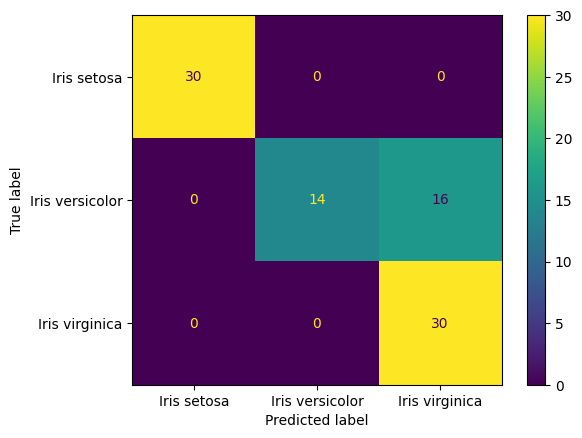

Accuracy for test set is 0.90


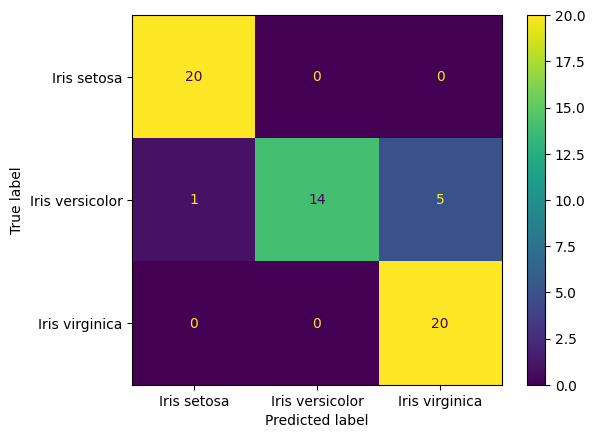

In [ ]:
#Two features 
X_reduced2 = np.delete(X_reduced, 0, 1)

if X_reduced.shape[1] == 4:
    X_reduced2 = np.delete(X_reduced2, 1, axis=1)

X_train_reduced2 = np.concatenate([X_reduced2[0:30], X_reduced2[50:80], X_reduced2[100:130]])

X_test_reduced2 = np.concatenate([X_reduced2[30:50], X_reduced2[80:100], X_reduced2[130:150]])

W_train_reduced2, loss_history = train_linear_classifier(X_train_reduced2, T_train, NUM_CLASSES, NUM_EPOCHS, LEARNING_RATE)

train_preds_red2, train_target_red2 = get_predictions_and_targets(X_train_reduced2,T_train, W_train_reduced2)


#Accuracy for reduced training set
train_acc_reduced2 = np.mean(train_preds_red2 == train_target_red2)
print(f"Accuracy for training set is {train_acc_reduced2:.2f}")


#Confusion matrix for reduced training set
test_confusion_matrix = metrics.confusion_matrix(train_target_red2, train_preds_red2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

#Using weights from training set for test set
test_preds_red2, test_target_red2 = get_predictions_and_targets(X_test_reduced2,T_test, W_train_reduced2)

#Confusion matrix for reduced test set
test_accuracy = np.mean(test_preds_red2 == test_target_red2)
print(f"Accuracy for test set is {test_accuracy:.2f}")

test_confusion_matrix = metrics.confusion_matrix(test_target_red2, test_preds_red2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()


Accuracy for training set is 0.82


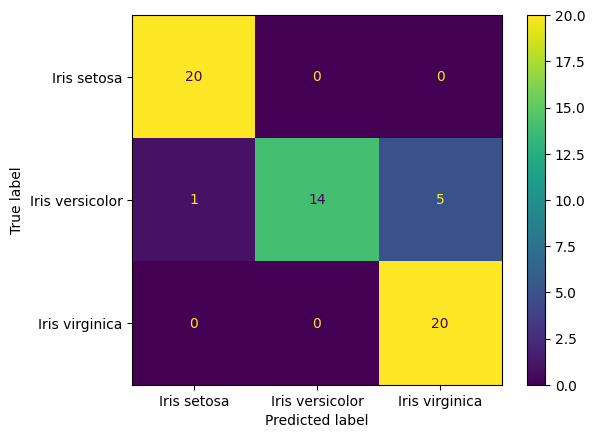

Accuracy for test set is 0.90


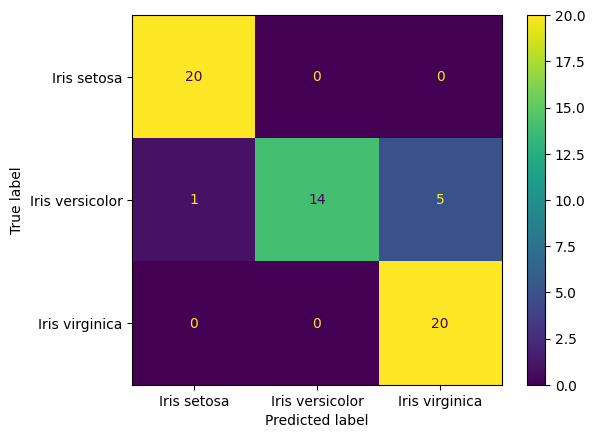

In [ ]:
#One feature
if X_reduced.shape[1] == 3:
    X_reduced2 = np.delete(X_reduced2, 1, axis=1)

X_reduced3 = np.delete(X_reduced2, 0, 1)

X_train_reduced3 = np.concatenate([X_reduced2[0:30], X_reduced2[50:80], X_reduced2[100:130]])

X_test_reduced3 = np.concatenate([X_reduced2[30:50], X_reduced2[80:100], X_reduced2[130:150]])

W_train_reduced3, loss_history = train_linear_classifier(X_train_reduced3, T_train, NUM_CLASSES, NUM_EPOCHS, LEARNING_RATE)

train_preds_red3, train_target_red3 = get_predictions_and_targets(X_train_reduced3,T_train, W_train_reduced2)


#Accuracy for reduced training set
train_acc_reduced3 = np.mean(train_preds_red3 == train_target_red3)
print(f"Accuracy for training set is {train_acc_reduced3:.2f}")


#Confusion matrix for reduced training set
train_confusion_matrix = metrics.confusion_matrix(train_target_red3, train_preds_red3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()

#Using weights from training set for test set
test_preds_red3, test_target_red3 = get_predictions_and_targets(X_test_reduced3,T_test, W_train_reduced3)

#Confusion matrix for reduced test set
train_accuracy = np.mean(test_target_red3 == test_preds_red3)
print(f"Accuracy for test set is {train_accuracy:.2f}")

test_confusion_matrix = metrics.confusion_matrix(test_target_red3, test_preds_red3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = test_confusion_matrix, display_labels = ['Iris setosa', 'Iris versicolor', 'Iris virginica'])
cm_display.plot()
plt.show()